In [78]:
import tensorflow as tf
import numpy as np
import h5py
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [7]:
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train, 'r')
    train_X = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test, 'r')
    test_X = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])
    
    return train_X, train_y, test_X, test_y

In [150]:
train_X_orig, train_y, test_X_orig, test_y = load_dataset('./happy_dataset/train_happy.h5', './happy_dataset/test_happy.h5')

print ("number of training examples = " + str(train_X_orig.shape[0]))
print ("number of test examples = " + str(test_X_orig.shape[0]))
print ("train_X shape: " + str(train_X_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_X shape: " + str(test_X_orig.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 600
number of test examples = 150
train_X shape: (600, 64, 64, 3)
train_y shape: (600,)
test_X shape: (150, 64, 64, 3)
Y_test shape: (150,)


In [167]:
train_X = []
for i in range(train_X_orig.shape[0]):
    image = train_X_orig[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    train_X.append(image)
test_X = []
for i in range(test_X_orig.shape[0]):
    image = test_X_orig[i]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    test_X.append(image)
train_X = np.array(train_X)
test_X = np.array(test_X)
train_X = tf.expand_dims(train_X, axis=-1)
test_X = tf.expand_dims(test_X, axis=-1)

In [168]:
print ("number of training examples = " + str(train_X.shape[0]))
print ("number of test examples = " + str(test_X.shape[0]))
print ("train_X shape: " + str(train_X.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_X shape: " + str(test_X.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 600
number of test examples = 150
train_X shape: (600, 64, 64, 1)
train_y shape: (600,)
test_X shape: (150, 64, 64, 1)
Y_test shape: (150,)


In [169]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, 3, input_shape=(64, 64, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [170]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [171]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=50)

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
19/19 [==============================] - 2s 104ms/step - loss: 3.5512 - accuracy: 0.4677
Epoch 2/50
19/19 [==============================] - 2s 93ms/step - loss: 0.5869 - accuracy: 0.6947
Epoch 3/50
19/19 [==============================] - 2s 87ms/step - loss: 0.4398 - accuracy: 0.7943
Epoch 4/50
19/19 [==============================] - 2s 90ms/step - l

In [172]:
model.evaluate(test_X, test_y)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/5 [==============================] - 0s 37ms/step - loss: 0.3541 - accuracy: 0.9267


[0.3541370928287506, 0.9266666769981384]

Shape :  (64, 64, 1)
Out :  0.30239183


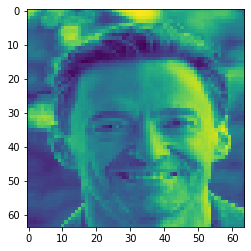

In [198]:
image = cv2.imread('./sample13.png')
image = np.array(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)
image = cv2.resize(image, (64, 64))
image = tf.expand_dims(image, axis=-1)
plt.imshow(image)
print('Shape : ',image.shape)
out = model.predict(tf.expand_dims(image, axis=0))[0][0]
print('Out : ', out)

In [122]:
video = cv2.VideoCapture('./30sec.avi')
ans = []
ids = []
while(video.isOpened()):
    try:
        print('TOTAL FRAMES : ',int(video.get(cv2.CAP_PROP_FRAME_COUNT)))
        check, frame = video.read()
        frame = np.array(frame)
        # frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
        # frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
        # frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image = np.array(frame) / 255
        image = cv2.resize(image, (64, 64))
    #    print(image.shape)
        out = model.predict(tf.expand_dims(image, axis=0))[0][0]
    #    print(out)
        ans.append(out)
        ids.append(int(video.get(1)))
        print(f'id : {int(video.get(1))} out : {out}')
    except:
        break


TOTAL FRAMES :  918
id : 1 out : 0.9895010590553284
TOTAL FRAMES :  918
id : 2 out : 0.9885289072990417
TOTAL FRAMES :  918
id : 3 out : 0.9875165224075317
TOTAL FRAMES :  918
id : 4 out : 0.9875444173812866
TOTAL FRAMES :  918
id : 5 out : 0.9875892996788025
TOTAL FRAMES :  918
id : 6 out : 0.9909678101539612
TOTAL FRAMES :  918
id : 7 out : 0.9919731616973877
TOTAL FRAMES :  918
id : 8 out : 0.9916782379150391
TOTAL FRAMES :  918
id : 9 out : 0.9925394654273987
TOTAL FRAMES :  918
id : 10 out : 0.9928075075149536
TOTAL FRAMES :  918
id : 11 out : 0.9934919476509094
TOTAL FRAMES :  918
id : 12 out : 0.993634819984436
TOTAL FRAMES :  918
id : 13 out : 0.9924539923667908
TOTAL FRAMES :  918
id : 14 out : 0.9924167394638062
TOTAL FRAMES :  918
id : 15 out : 0.9924278855323792
TOTAL FRAMES :  918
id : 16 out : 0.992565393447876
TOTAL FRAMES :  918
id : 17 out : 0.9924307465553284
TOTAL FRAMES :  918
id : 18 out : 0.9914405345916748
TOTAL FRAMES :  918
id : 19 out : 0.9913709163665771
TOTA

In [123]:
ans = np.array(ans)
ans = np.where(ans>0.5, True, False)
data_out = pd.DataFrame({'Frame_ID' : ids, 'Happiness' : ans})
data_out

,Frame_ID,Happiness
0,1,True
1,2,True
2,3,True
3,4,True
4,5,True
...,...,...
913,914,True
914,915,True
915,916,True
916,917,True


In [126]:
data_out.groupby('Happiness').count()

,Frame_ID
Happiness,
False,29
True,889


()